# Data Analysis using Statistical methods

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import shapiro


## 1. Data Exploration

### 1.1 Meet the data
#### Objectives:
- Know the dimension of the dataframe
- Know the type of each variable (Continuous or Categorical)
- Check for the no. of missing values
- Decide on the target variable



In [39]:
heart_data = pd.read_csv('data/2020/heart_2020_cleaned.csv')
heart_data.head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [40]:
print(f'Dimensions of the data: {heart_data.shape}')
heart_data.dtypes


Dimensions of the data: (319795, 18)


HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

Description of each column

| <b>Column</b> | <b>Data type</b> |
|----------|----------|
| HeartDisease   | Nominal   |
| BMI    | Continuous    |
| Smoking      | Nominal      |
| AlcoholDrinking      | Nominal      |
| Stroke        | Nominal      |
| PhysicalHealth       | Ordinal      |
| MentalHealth      | Ordinal      |
| DiffWalking      | Nominal      |
| Sex         | Nominal      |
| AgeCategory      | Nominal      |
| Race      | Nominal      |
| Diabetic      | Nominal      |
| PhysicalActivity      | Nominal      |
| GenHealth      | Ordinal      |
| SleepTime      | Continuous      |
| Asthma        | Nominal      |
| KidneyDisease       | Nominal      |
| SkinCancer   | Nominal   |

In the above data, there are 18 different columns and over 300k datapoints


In [41]:
missing_values = heart_data.isnull().sum()
print(missing_values)


HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64



- Fortunately, there are no missing values in this data. Hence, we shall go to the next step of data visualization.
- Going forward, we shall consider `HeartDisease` as the target variable

### 1.2 Summary Statistics and Data Visualization
#### Objectives:
- Calculate the five number summary for the continuous variables
- Plot different visualizations to better understand the data

In [42]:
# Creating a list of the continuous variables and categorical variables
continuous_variables = ['BMI', 'SleepTime']
nominal_variables = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Race', 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']
ordinal_variables = ['PhysicalHealth', 'MentalHealth', 'AgeCategory', 'GenHealth']

In [43]:
heart_data[continuous_variables].describe()

,BMI,SleepTime
count,319795.000000,319795.000000
mean,28.325399,7.097075
std,6.356100,1.436007
min,12.020000,1.000000
25%,24.030000,6.000000
50%,27.340000,7.000000
75%,31.420000,8.000000
max,94.850000,24.000000


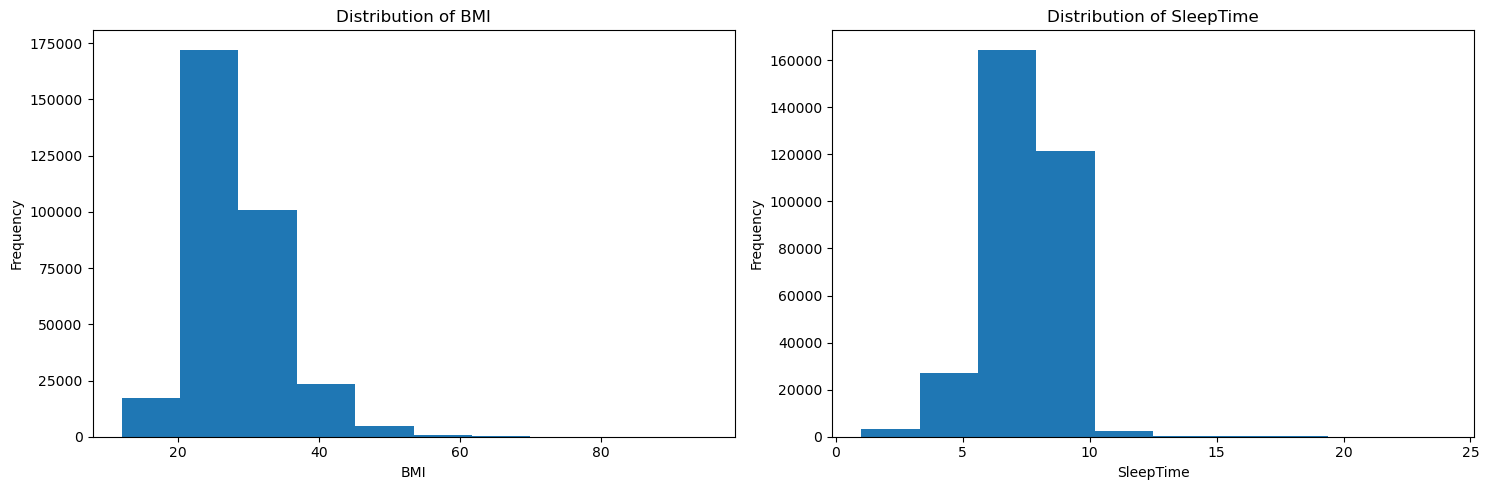

In [44]:
# Creating a figure and subplots
fig, axes = plt.subplots(1, len(continuous_variables), figsize=(15, 5))

# Looping through each continuous variable and plotting the corresponding visualization
for i, var in enumerate(continuous_variables):
    axes[i].hist(heart_data[var], bins=10)
    axes[i].set_title(f"Distribution of {var}")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Frequency")

# Adjusting the spacing between subplots
plt.tight_layout()

# Showing the plot
plt.show()


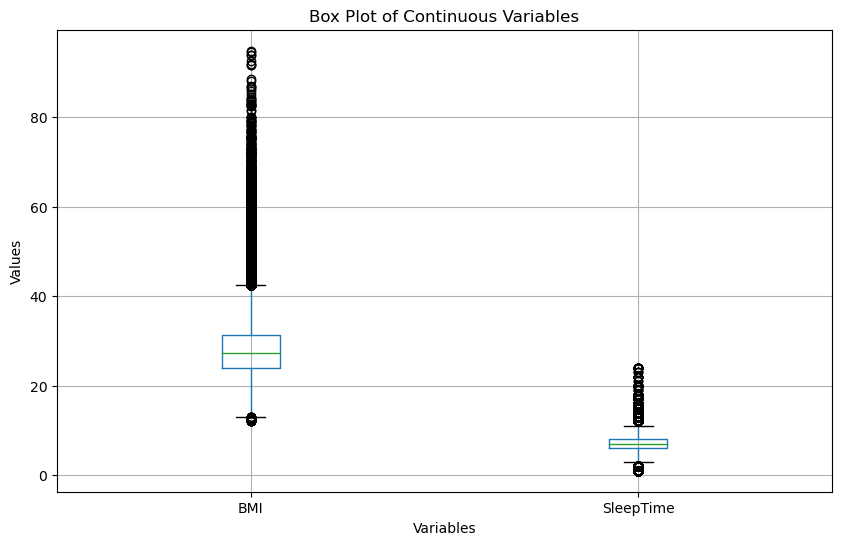

In [45]:
plt.figure(figsize=(10, 6))
heart_data[continuous_variables].boxplot()
plt.title('Box Plot of Continuous Variables')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.show()

In [46]:
# Calculating the IQR for each continuous variable
Q1 = heart_data[continuous_variables].quantile(0.25)
Q3 = heart_data[continuous_variables].quantile(0.75)
IQR = Q3 - Q1

# Calculating the number of outliers for each continuous variable
outliers = ((heart_data[continuous_variables] < (Q1 - 1.5 * IQR)) | (heart_data[continuous_variables] > (Q3 + 1.5 * IQR))).sum()

print('Number of outliers for each continuous variable:')
print(outliers)

Number of outliers for each continuous variable:
BMI          10396
SleepTime     4543
dtype: int64


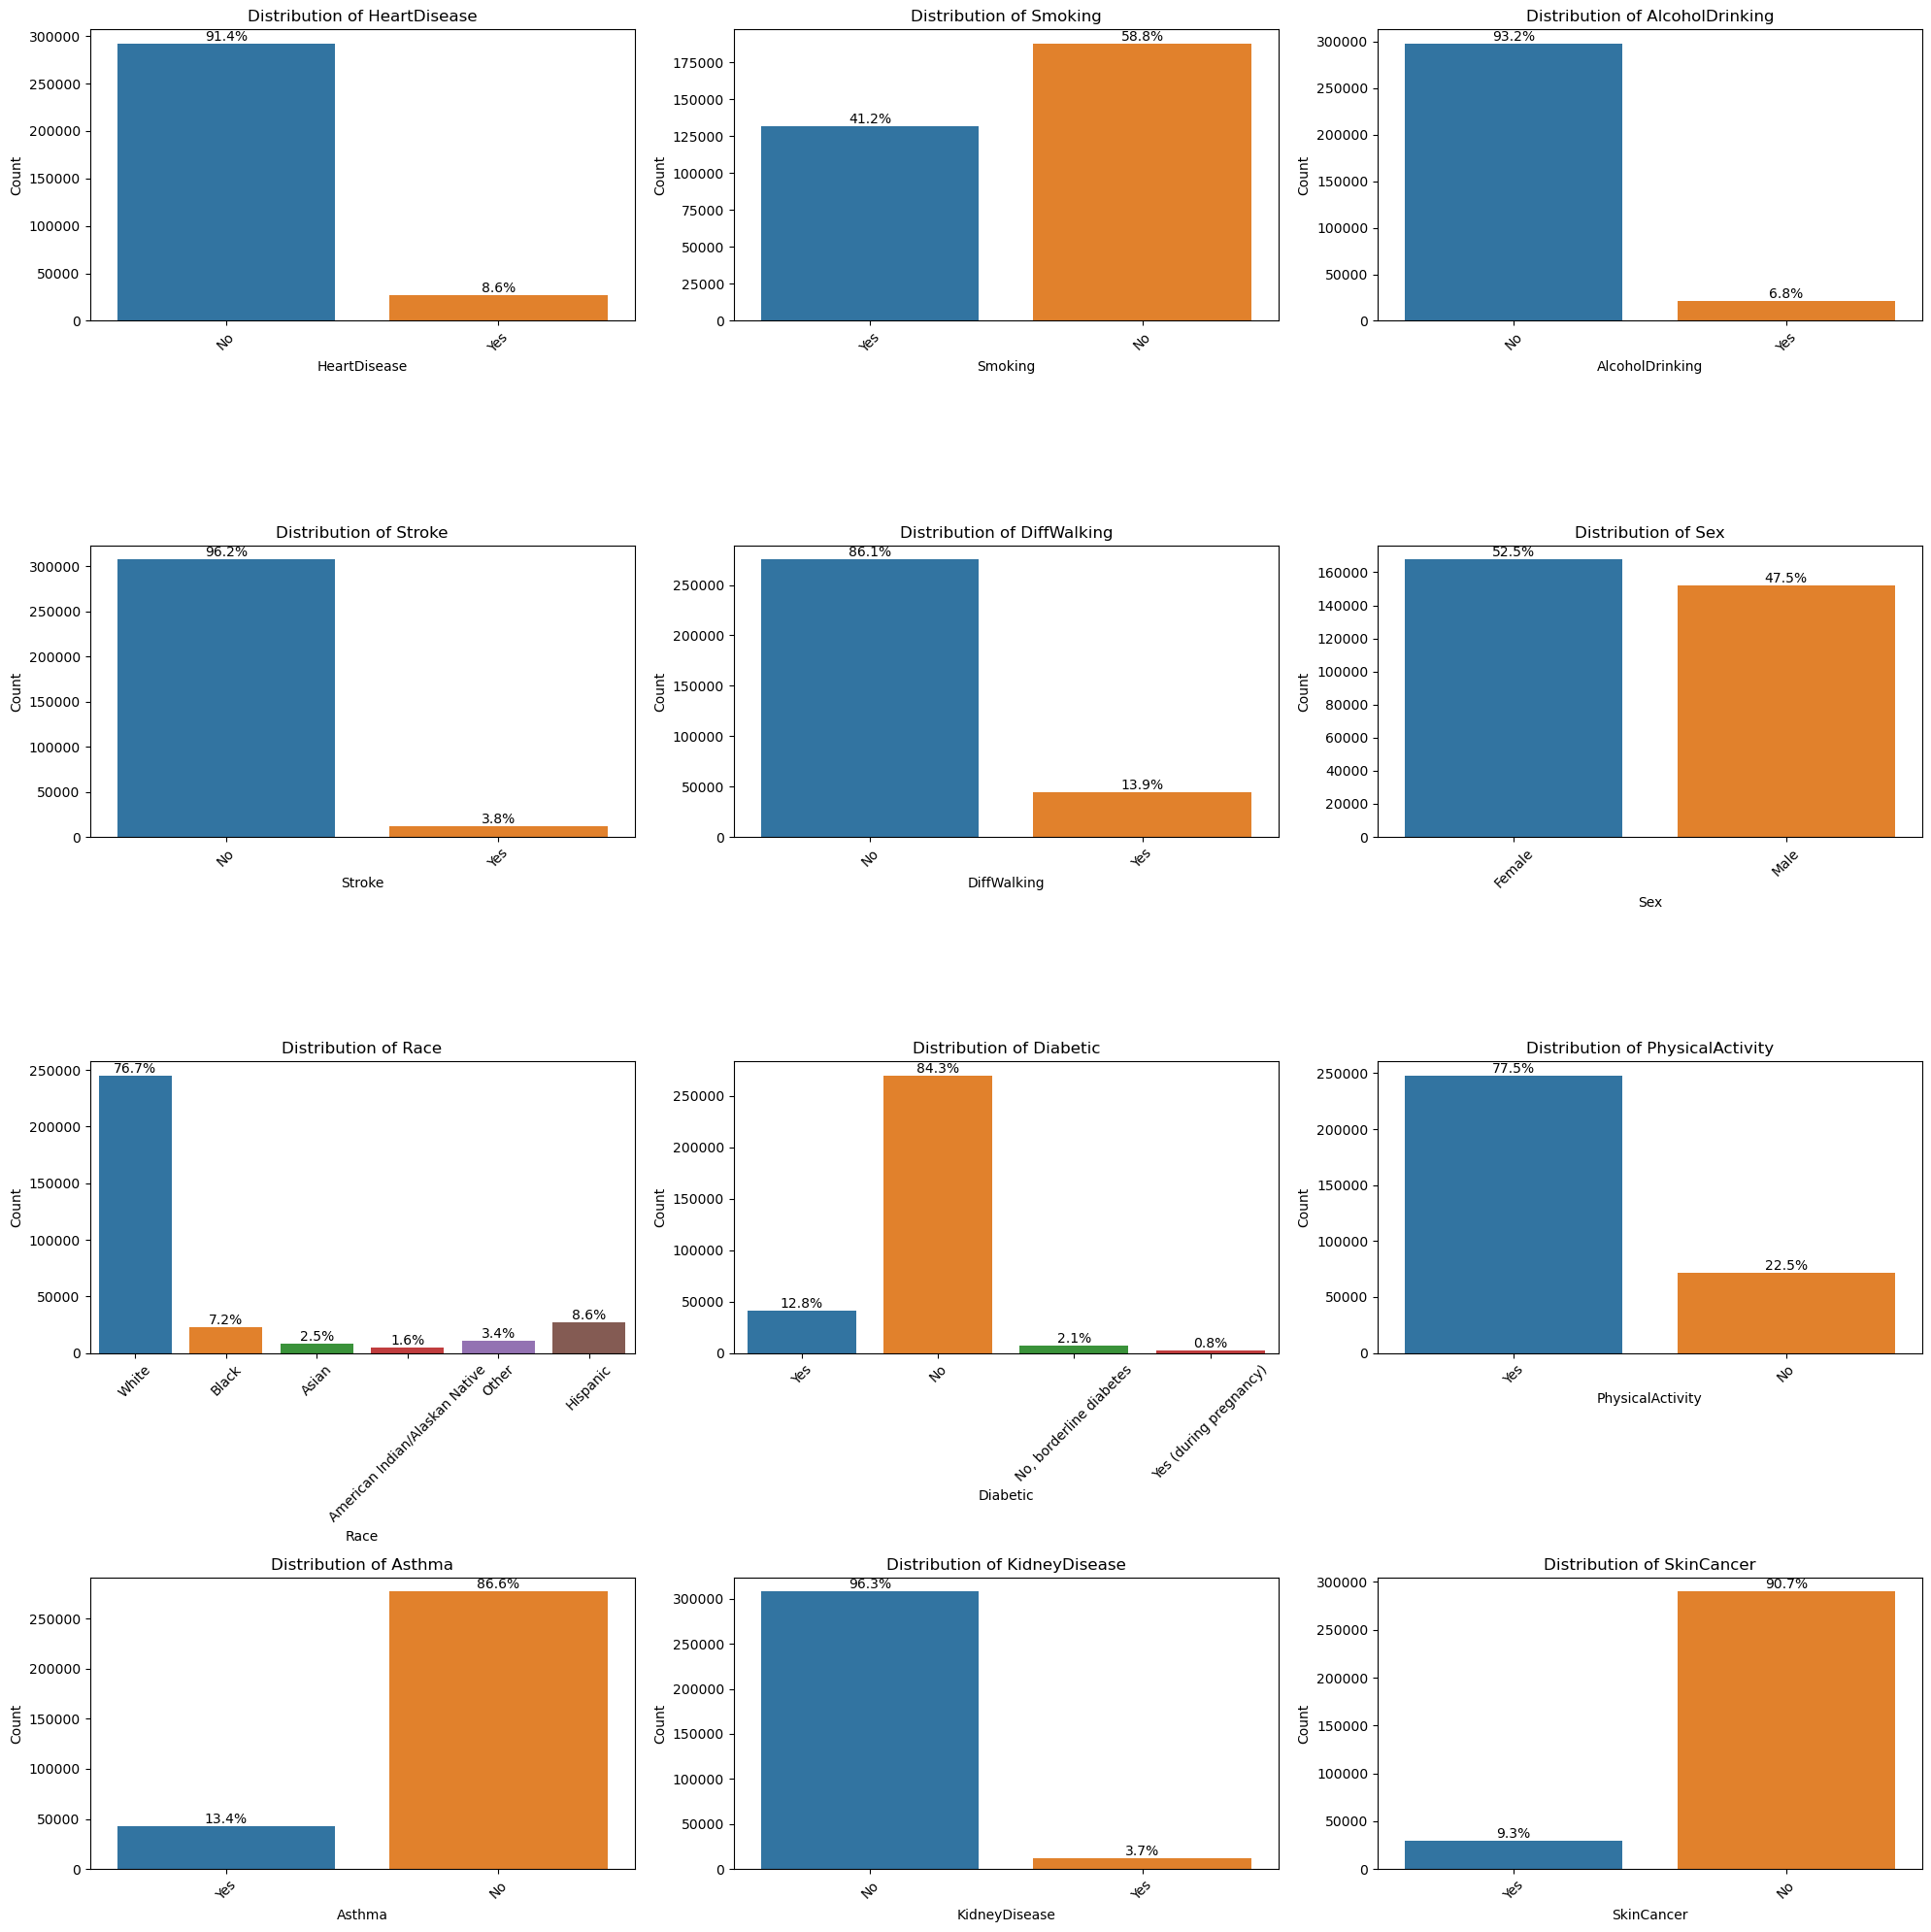

In [47]:
# Defining the number of rows and columns for the subplots
num_rows = 4
num_cols = 3

# Creating a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

axes = axes.flatten()

for i, nom_var in enumerate(nominal_variables):
    sns.countplot(x=nom_var, data=heart_data, ax=axes[i])
    axes[i].set_title(f"Distribution of {nom_var}")
    axes[i].set_xlabel(nom_var)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45) 
    
    total = len(heart_data)
    for p in axes[i].patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        axes[i].annotate(percentage, (x, y), ha='center', va='bottom')
    
plt.tight_layout()
plt.show()


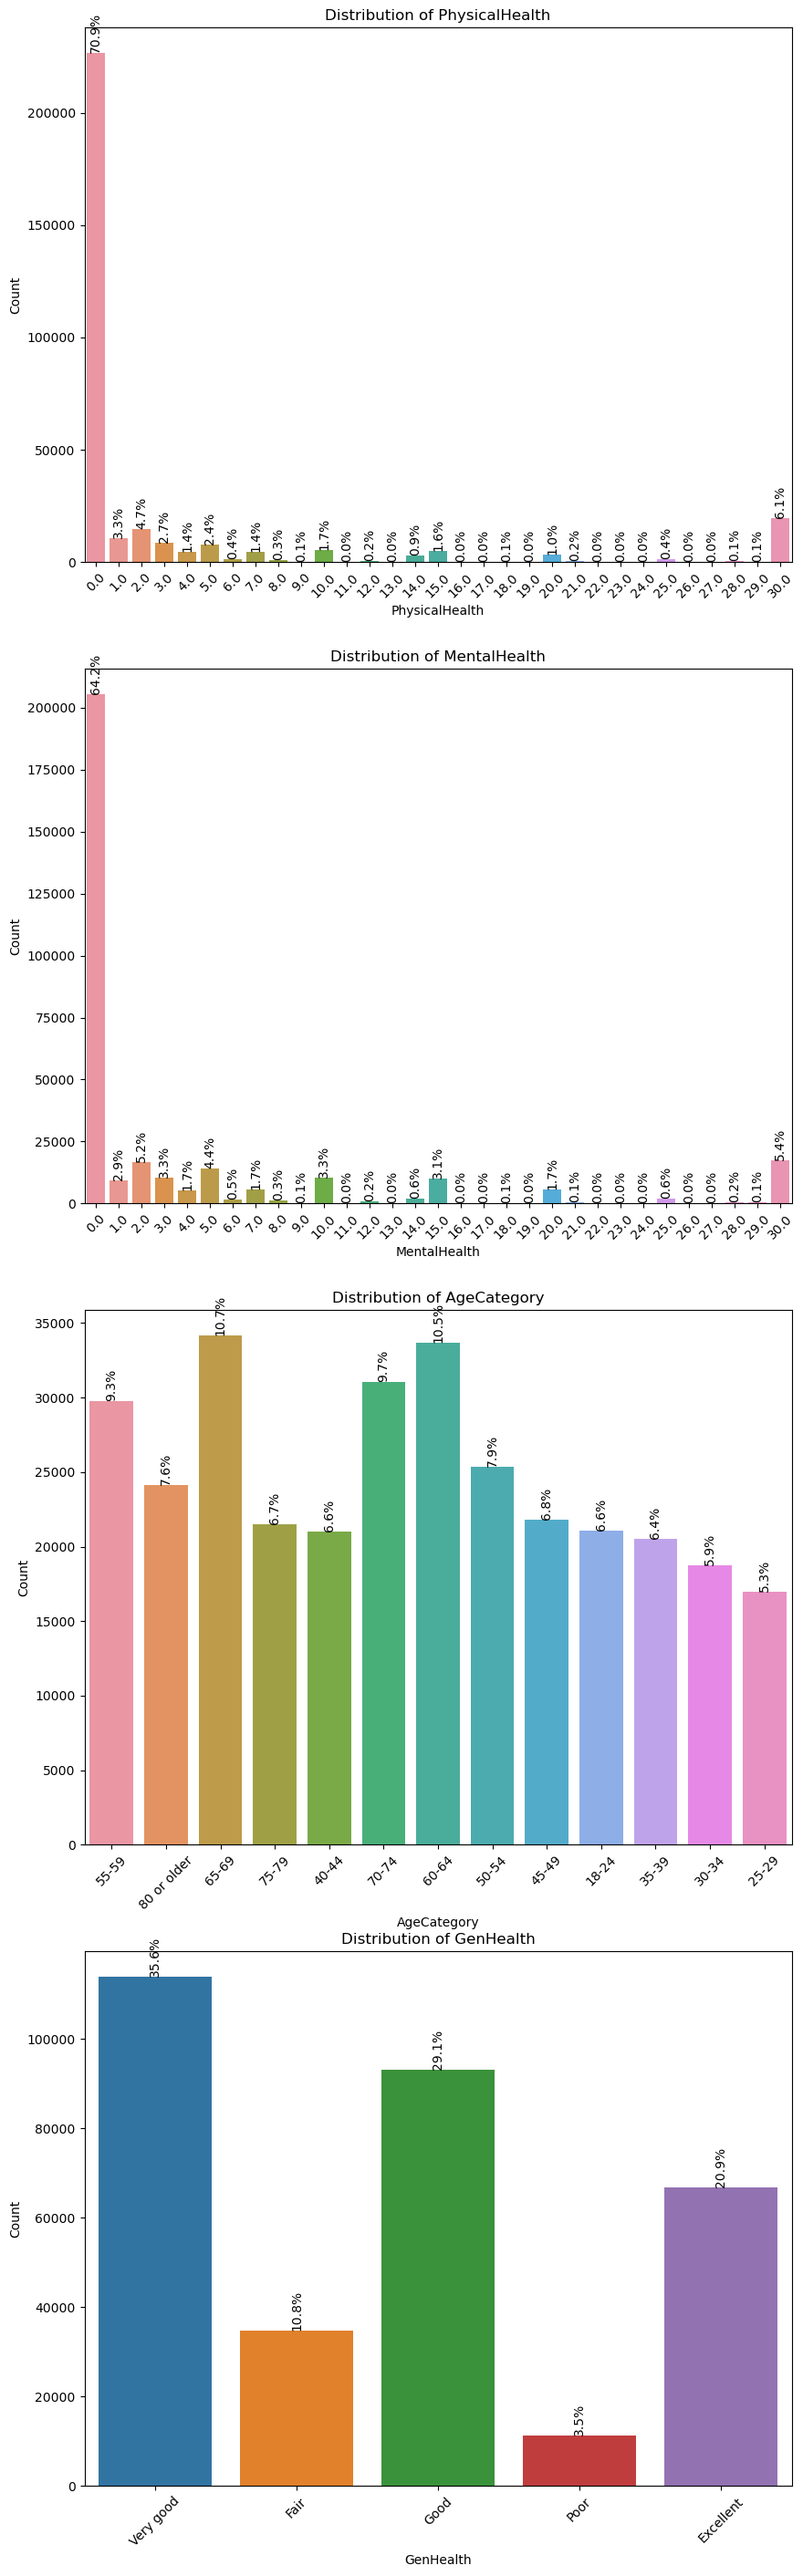

In [48]:
# Creating a figure and subplots
fig, axes = plt.subplots(len(ordinal_variables), 1, figsize=(10, 35))
# Looping through each ordinal variable
for i, var in enumerate(ordinal_variables):
    # Creating a count plot for the current ordinal variable
    sns.countplot(x=var, data=heart_data, ax=axes[i])
    axes[i].set_title(f"Distribution of {var}")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)
    
    total = len(heart_data)
    for p in axes[i].patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        axes[i].annotate(percentage, (x, y), ha='center', va='bottom', rotation=90)


#### Summary:
- There are 10k data points of BMI and 4.5k data points of SleepTime
- The variables, `HeartDisease`, `AlcoholDrinking`, `Stroke`, `DiffWalking`, `PhysicalActivity`, `Asthma`, `KidneyDisease`, `SkinCancer`, `Race`, `Diabetic`, `PhysicalHealth`, `MentalHealth` are highly imbalanced
- Since, we are dealing with data related to human beings and their health, variations in columns are natural. Hence, we shall not drop any outliers
- The visualization of the continuous variables do not give us the surity that it is a normal distribution. Hence, we shall perform tests to check their normality



### 1.3 Normality Tests
#### Objectives:
To test the normality of the variables `BMI`, `SleepTime`, we shall do the following:
- Use QQ plot to understand how close they are to a normal distribution
- Use Statistical Methods to check if they are normal

#### QQ Plot

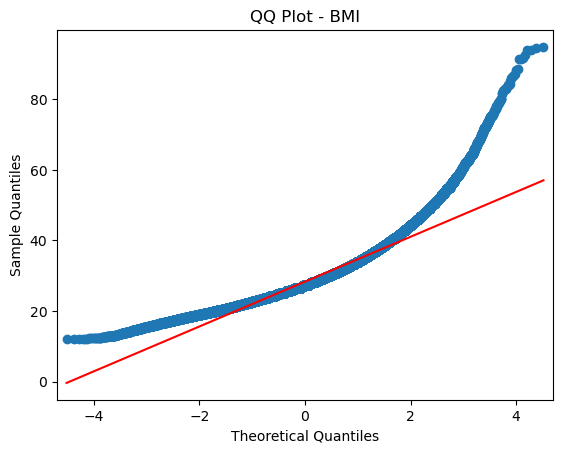

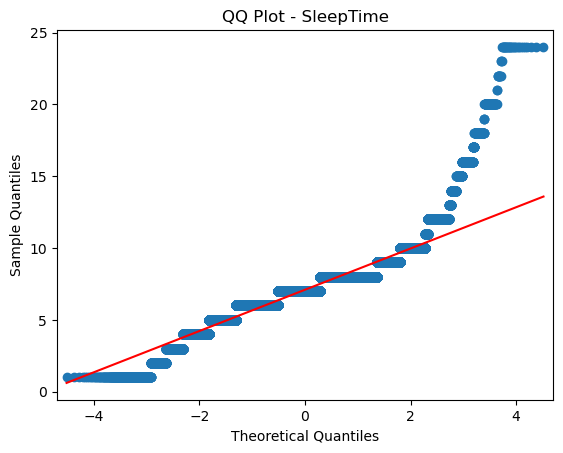

In [49]:
# Creating QQ plot for BMI
sm.qqplot(heart_data['BMI'], line='s')
plt.title('QQ Plot - BMI')
plt.show()

# Creating QQ plot for SleepTime
sm.qqplot(heart_data['SleepTime'], line='s')
plt.title('QQ Plot - SleepTime')
plt.show()


#### Summary:
- Since the plot is nowhere closer to the straight line, we shall conclude that these variables are not normal.
- This observation shall be pivotal in inferential statistics, especially when applying different tests

### 1.4 Data Preprocessing and Correlation Analysis
#### Objectives: 
- Prepare the data for correlation analysis and for further analysis
- Plot the correlation matrix to better understand the relevance of one variable and the other


In [50]:
# Removing the data points where diabetes is either borderline or for pregnant women

heart_data = heart_data[heart_data.Diabetic != 'No, borderline diabetes']
heart_data = heart_data[heart_data.Diabetic != 'Yes (during pregnancy)']



In [51]:
# Converting the categorical variables

binary_variables = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer', 'Diabetic']
multi_categories = ['Race', 'AgeCategory', 'GenHealth']

label_encoding_dict = {'No': 0, 'Yes': 1, 
                       'Female': 1, 'Male': 0,
                       'White': 0, 'Hispanic': 1, 'Black': 2, 'Asian': 3, 'Other': 4, 'American Indian/Alaskan Native': 5,
                       'Poor': 0, 'Fair': 1, 'Good': 2, 'Very good': 3, 'Excellent': 4,
                       '18-24': 0, '25-29': 1, '30-34': 2, '35-39': 3, '40-44': 4, '45-49': 5, '50-54': 6, '55-59': 7, '60-64': 8, '65-69': 9, '70-74': 10, '75-79': 11, '80 or older': 12}

for var in binary_variables:
    heart_data[var] = heart_data[var].map(label_encoding_dict)

for var in multi_categories:
    heart_data[var] = heart_data[var].map(label_encoding_dict)


In [52]:
heart_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,1,7,0,1,1,3,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,12,0,0,1,3,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,0,9,0,1,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,1,11,0,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,1,4,0,0,1,3,8.0,0,0,0


In [53]:
print(f'Shape of the data: {heart_data.shape}')

Shape of the data: (310455, 18)


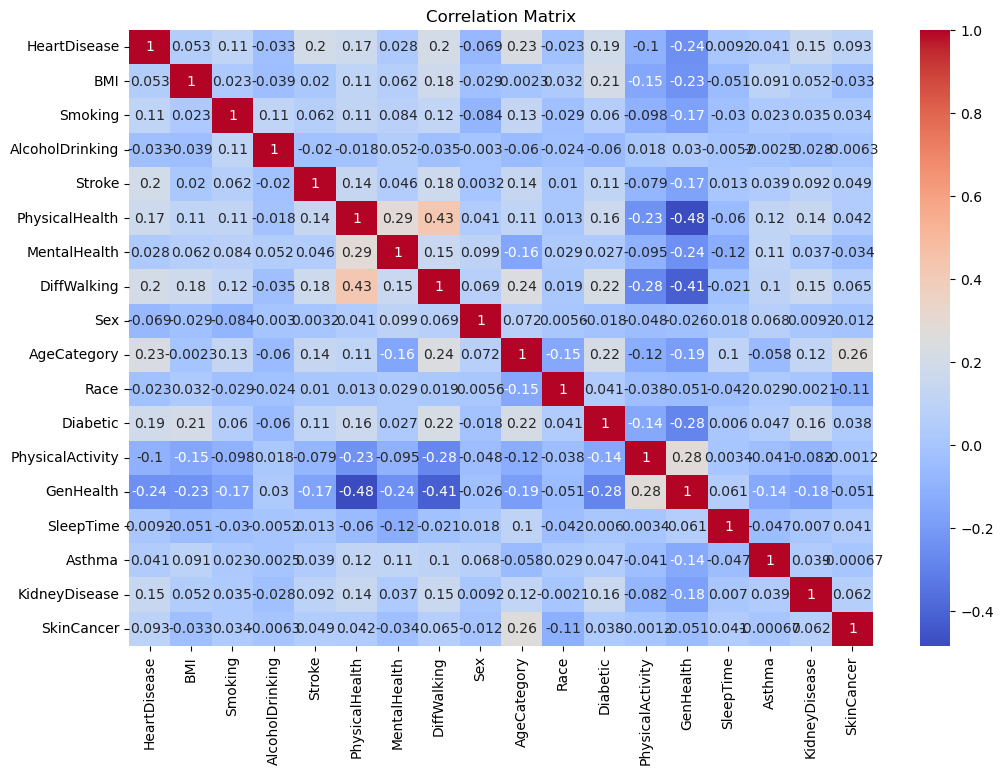

In [54]:
if not os.path.exists('visualizations'):
    os.makedirs('visualizations')

# Save the plot in the 'visualizations' directory
plt.figure(figsize=(12, 8))
sns.heatmap(heart_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('visualizations/correlation_matrix.png')
plt.show()
